## Plot circuation patterns DnW ##

Plotting the spatial patterns of temperature, 10m wind speed, and mean sea level pressure for challenging demand net wind days, in the model and the observations.

In [1]:
# Local imports
import os
import sys
import glob

# Third-party imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import iris
import cartopy.crs as ccrs

# Specific imports
from tqdm import tqdm
from datetime import datetime, timedelta

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [5]:
# ------------------------
# Set up the hard coded variables
# ------------------------

season = "DJF"
time_freq = "day"
len_winter_days = 6000
dfs_dir = "/gws/nopw/j04/canari/users/benhutch/unseen/saved_dfs/"
obs_df_fname = "block_maxima_obs_demand_net_wind_30-06-2025_2020-2024.csv"
wp_output_dir = "/gws/nopw/j04/canari/users/benhutch/unseen/saved_dfs/model/WP_gen"
dfs_output_dir = "/home/users/benhutch/unseen_multi_year/dfs"
obs_fname = "full_field_obs_tas_wind_UK_1961-2024_DJF_detrended_01-07-2025_dnw.csv"


In [8]:
obs_df_block = pd.read_csv(os.path.join(dfs_dir, obs_df_fname))

In [9]:
obs_df_block.head()

,Unnamed: 0,effective_dec_year,demand_net_wind_max,total_gen,data_c_dt_UK_demand,time,data_c_dt,data_sfcWind_dt
0,0,1961-01-01,42.375423,2.381933,44.757356,1961-12-18,2.523600,3.550781
1,1,1962-01-01,45.249130,2.024256,47.273385,1963-02-22,-0.841836,3.123566
2,2,1963-01-01,41.275357,2.506699,43.782057,1963-12-09,3.828159,3.879767
3,3,1964-01-01,41.156169,4.109344,45.265513,1965-02-02,1.843890,5.445452
4,4,1965-01-01,43.068374,3.445201,46.513574,1966-01-17,0.174486,4.156066


In [6]:
# ------------------------
# Load in the obs df
# ------------------------

obs_df = pd.read_csv(os.path.join(dfs_output_dir, obs_fname))

In [7]:
obs_df.head()

,time,data_tas,data_c,data_sfcWind,data_wp_generation,combined_cfs,effective_dec_year,data_c_dt,data_sfcWind_dt,combined_cfs_dt,total_gen,hdd,cdd,data_c_dt_UK_demand,demand_net_wind
0,1961-12-01,278.569544,5.419544,7.573910,9.074235,0.413943,1961,7.628006,7.886256,0.442651,13.475930,7.871994,0,40.941258,27.465327
1,1961-12-02,275.647926,2.497926,8.598442,13.568653,0.618966,1961,4.706388,8.910788,0.647674,19.717606,10.793612,0,43.125484,23.407879
2,1961-12-03,273.728248,0.578248,6.730659,5.470028,0.249528,1961,2.786711,7.043005,0.278236,8.470544,12.713289,0,44.560652,36.090108
3,1961-12-04,277.405764,4.255764,8.079840,12.264395,0.559469,1961,6.464227,8.392186,0.588177,17.906302,9.035773,0,41.811309,23.905007
4,1961-12-05,276.771560,3.621560,11.786189,17.461881,0.796565,1961,5.830022,12.098535,0.825273,25.124372,9.669978,0,42.285446,17.161074


In [10]:
obs_df.tail()

,Unnamed: 0,effective_dec_year,demand_net_wind_max,total_gen,data_c_dt_UK_demand,time,data_c_dt,data_sfcWind_dt
59,59,2020-01-01,42.290001,2.136083,44.426085,2020-12-06,2.966708,3.925149
60,60,2021-01-01,41.740821,2.836087,44.576908,2021-12-21,2.764967,3.700314
61,61,2022-01-01,45.539781,1.377991,46.917772,2022-12-11,-0.366169,3.705928
62,62,2023-01-01,44.461347,3.265523,47.726869,2023-12-02,-1.448416,3.256901
63,63,2024-01-01,43.622964,0.886979,44.509942,2025-01-22,2.854540,2.497001


### Load and process the observations first ###

Plot the composites for T, sfcWind, and msl for all of the DnW days, days beneath the 20th percentile, and the most extreme day.

In [2]:
# -------------------------------------
# Load in the obs df for demand net wind
# -------------------------------------

# Set up the directory in whcih the dfs are stored
dfs_dir = "/gws/nopw/j04/canari/users/benhutch/unseen/saved_dfs/"

# Set up the fname of the obs df
obs_df_fname = "block_maxima_obs_demand_net_wind.csv"

# If the path esists, load in the obs df
if os.path.exists(os.path.join(dfs_dir, obs_df_fname)):
    obs_df = pd.read_csv(os.path.join(dfs_dir, obs_df_fname), index_col=0)
else:
    print(f"Obs df not found at {os.path.join(dfs_dir, obs_df_fname)}")
    obs_df = pd.DataFrame()

In [3]:
obs_df.head()

,demand_net_wind_max,sigmoid_total_wind_gen,UK_demand,time
effective_dec_year,,,,
1960-01-01,41.972530,2.950432,44.922962,1960-12-13
1961-01-01,43.274263,1.684061,44.958324,1961-12-18
1962-01-01,46.424438,1.056137,47.480575,1963-02-22
1963-01-01,42.621994,3.415367,46.037361,1964-02-20
1964-01-01,40.062115,4.855531,44.917646,1964-12-18


In [20]:
# --------------------------------------
# Slightly different method - loading in winter arrays
# --------------------------------------

winter_arrs_dir = "/gws/nopw/j04/canari/users/benhutch/unseen/saved_arrs/obs/"

# Set up the region
variable = "psl"
region = "NA"
season = "DJF"
time_freq = "day"

# Set up the winter years
winter_years = np.arange(1960, 2018 + 1, 1)

first_dim_ticker = 0

# Set up the empty array to append to
arr_all = np.zeros((5324, 90, 96))

# Loop over the winter years
for winter_year in tqdm(winter_years):
    # Set up the fname
    fname_this = f"ERA5_{variable}_{region}_{winter_year}_{season}_{time_freq}.npy"

    # if the path exists, load in the arr
    if os.path.exists(os.path.join(winter_arrs_dir, fname_this)):
        arr_this = np.load(os.path.join(winter_arrs_dir, fname_this))
    else:
        print(f"Arr not found at {os.path.join(winter_arrs_dir, fname_this)}")
        arr_this = np.array([])

    # Append the arr to the all arr
    if arr_this.size != 0:
        arr_all[first_dim_ticker:first_dim_ticker + arr_this.shape[0], :, :] = arr_this
        first_dim_ticker += arr_this.shape[0]
    else:
        print(f"Arr not found at {os.path.join(winter_arrs_dir, fname_this)}")

100%|██████████| 59/59 [00:00<00:00, 412.80it/s]


In [27]:
# do the same but for temperature over europe
# Set up the variable
variable = "sfcWind"
region = "Europe"

# Set up the empty array to append to
arr_all_sfcWind = np.zeros((5324, 63, 49))

# reset the first dim ticker
first_dim_ticker = 0

# Loop over the winter years
for winter_year in tqdm(winter_years):
    # Set up the fname
    fname_this = f"ERA5_{variable}_{region}_{winter_year}_{season}_{time_freq}.npy"

    # if the path exists, load in the arr
    if os.path.exists(os.path.join(winter_arrs_dir, fname_this)):
        arr_this = np.load(os.path.join(winter_arrs_dir, fname_this))
    else:
        print(f"Arr not found at {os.path.join(winter_arrs_dir, fname_this)}")
        arr_this = np.array([])

    # Append the arr to the all arr
    if arr_this.size != 0:
        arr_all_sfcWind[first_dim_ticker:first_dim_ticker + arr_this.shape[0], :, :] = arr_this
        first_dim_ticker += arr_this.shape[0]
    else:
        print(f"Arr not found at {os.path.join(winter_arrs_dir, fname_this)}")

100%|██████████| 59/59 [00:44<00:00,  1.33it/s]


In [28]:
arr_all_sfcWind

array([[[ 4.76840734,  4.05285215,  3.59385085, ...,  4.68580008,
          3.768507  ,  4.19746399],
        [ 4.91072369,  3.85392761,  3.7688899 , ...,  3.97674775,
          3.3767271 ,  2.63585806],
        [ 4.75057554,  4.09058428,  4.61832285, ...,  3.59751892,
          2.55470753,  1.06710148],
        ...,
        [16.69520569, 17.18797874, 17.55092239, ...,  4.49211311,
          3.87177396,  3.85574579],
        [15.6509285 , 16.0458374 , 16.49629211, ...,  4.64413309,
          4.30542088,  4.27563572],
        [14.51472664, 14.84463024, 15.14892101, ...,  5.82391167,
          5.84415674,  5.5146904 ]],

       [[10.45857334, 10.16313362,  9.45940304, ...,  5.26188278,
          5.56848955,  6.1028986 ],
        [10.33860683, 10.29168797,  9.18329144, ...,  3.34596896,
          3.20188665,  3.87990308],
        [10.16313457, 10.27169132,  8.89714336, ...,  1.74721169,
          1.20350492,  1.0148741 ],
        ...,
        [12.66818237, 12.80980682, 12.32164955, ...,  

In [30]:
# --------------------------------------
# Calculate the climatology
# --------------------------------------

# Set up the climatology
arr_all_psl = arr_all
arr_all_sfcWind = arr_all_sfcWind

# Calculate the climatology
climatology_psl = np.mean(arr_all_psl, axis=0)
climatology_sfcWind = np.mean(arr_all_sfcWind, axis=0)

In [32]:
# -----------------------------------
# Load in the Europe and the North Atlantic lats and lons
# -----------------------------------
lats_na_path = "/gws/nopw/j04/canari/users/benhutch/unseen/saved_arrs/metadata/HadGEM3-GC31-MM_psl_NA_1972_DJF_day_lats.npy"
lons_na_path = "/gws/nopw/j04/canari/users/benhutch/unseen/saved_arrs/metadata/HadGEM3-GC31-MM_psl_NA_1972_DJF_day_lons.npy"

lats_eu_path = "/gws/nopw/j04/canari/users/benhutch/unseen/saved_arrs/metadata/HadGEM3-GC31-MM_psl_Europe_1972_DJF_day_lats.npy"
lons_eu_path = "/gws/nopw/j04/canari/users/benhutch/unseen/saved_arrs/metadata/HadGEM3-GC31-MM_psl_Europe_1972_DJF_day_lons.npy"

# Load in the lats and lons
lats_na = np.load(lats_na_path)
lons_na = np.load(lons_na_path)

# load in the lats and lons for europe
lats_eu = np.load(lats_eu_path)
lons_eu = np.load(lons_eu_path)

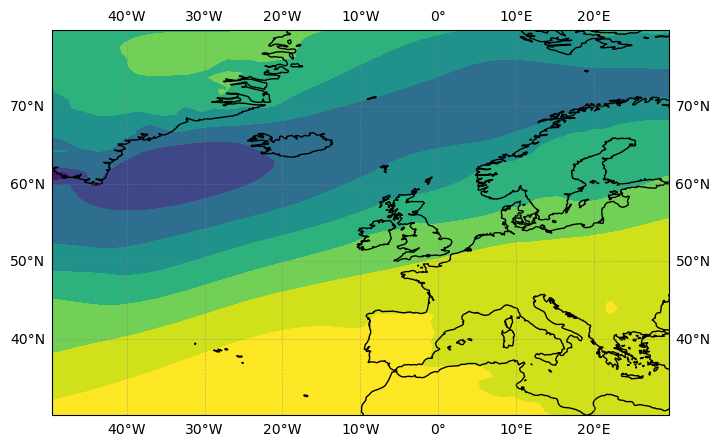

In [34]:
# ----------------------------------
# Set up the figure
# ----------------------------------
fig, ax = plt.subplots(1, 1, figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})

# Set up the contour levels
plt.contourf(lons_na, lats_na, climatology_psl, cmap='viridis', extend='both')

# Add the coastlines
ax.coastlines()

# Add the gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

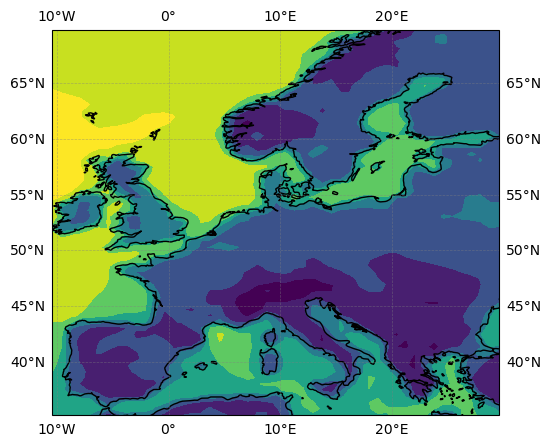

In [35]:
# ----------------------------------
# Plot the climatology for psl
# ----------------------------------

# Set up the figure
fig, ax = plt.subplots(1, 1, figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})

# Set up the contour levels
plt.contourf(lons_eu, lats_eu, climatology_sfcWind, cmap='viridis', extend='both')

# Set up the gridlines
ax.coastlines()

# Add the gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

In [37]:
# do the same for tas
# Set up the variable
variable = "tas"

# Set up the empty array to append to
arr_all_tas = np.zeros((5324, 63, 49))

# reset the first dim ticker
first_dim_ticker = 0

# Loop over the winter years
for winter_year in tqdm(winter_years):
    # Set up the fname
    fname_this = f"ERA5_{variable}_{region}_{winter_year}_{season}_{time_freq}.npy"

    # if the path exists, load in the arr
    if os.path.exists(os.path.join(winter_arrs_dir, fname_this)):
        arr_this = np.load(os.path.join(winter_arrs_dir, fname_this))
    else:
        print(f"Arr not found at {os.path.join(winter_arrs_dir, fname_this)}")
        arr_this = np.array([])

    # Append the arr to the all arr
    if arr_this.size != 0:
        arr_all_tas[first_dim_ticker:first_dim_ticker + arr_this.shape[0], :, :] = arr_this
        first_dim_ticker += arr_this.shape[0]
    else:
        print(f"Arr not found at {os.path.join(winter_arrs_dir, fname_this)}")

100%|██████████| 59/59 [00:00<00:00, 228.29it/s]


In [38]:
arr_all_tas

array([[[289.43154907, 289.54547119, 289.59790039, ..., 292.06707764,
         292.54754639, 292.88278198],
        [289.23052979, 289.33096313, 289.33383179, ..., 291.74493408,
         292.44805908, 292.6852417 ],
        [289.0249939 , 289.09042358, 289.09585571, ..., 291.31866455,
         291.58563232, 284.45141602],
        ...,
        [273.12741089, 273.72662354, 274.33456421, ..., 259.30285645,
         258.75018311, 257.52658081],
        [271.90307617, 272.48324585, 273.11190796, ..., 259.09127808,
         258.97277832, 258.14599609],
        [270.95657349, 271.31103516, 271.72695923, ..., 259.22241211,
         258.76669312, 258.62289429]],

       [[289.06182861, 288.89248657, 288.94195557, ..., 292.49591064,
         292.51803589, 292.60327148],
        [288.81134033, 288.58804321, 288.39932251, ..., 291.95639038,
         292.04031372, 292.12011719],
        [288.55517578, 288.29684448, 287.74282837, ..., 291.33410645,
         290.81118774, 283.87194824],
        ...,


In [4]:
%%time
# -------------------------------------
# First load in the obs MSLP data
# -------------------------------------

obs_path_psl = (
    "/gws/nopw/j04/canari/users/benhutch/ERA5/ERA5_msl_daily_1960_2020_daymean.nc"
)

# Load the data
obs_psl_cube = iris.load_cube(obs_path_psl, "msl")

CPU times: user 4.05 s, sys: 523 ms, total: 4.57 s
Wall time: 31.3 s


In [5]:
%%time
# -------------------------------------
# Load in the obs wind data
# -------------------------------------

obs_path_sfcWind = (
    "/gws/nopw/j04/canari/users/benhutch/ERA5/ERA5_wind_daily_1952_2020.nc"
)

# Load the data
obs_sfcWind_cube = iris.load_cube(obs_path_sfcWind, "si10")

CPU times: user 6.59 ms, sys: 4.04 ms, total: 10.6 ms
Wall time: 375 ms


In [6]:
%%time
# -------------------------------------
# Load in the obs temperature data
# -------------------------------------

obs_path_tas = (
    "/gws/nopw/j04/canari/users/benhutch/ERA5/ERA5_t2m_daily_1950_2020.nc"
)

# Load the data
obs_tas_cube = iris.load_cube(obs_path_tas, "t2m")

CPU times: user 8.98 ms, sys: 2.29 ms, total: 11.3 ms
Wall time: 26.5 s


In [7]:
obs_psl_cube

<iris 'Cube' of air_pressure_at_mean_sea_level / (Pa) (time: 22281; latitude: 214; longitude: 304)>

In [8]:
obs_psl_cube.shape

(22281, 214, 304)

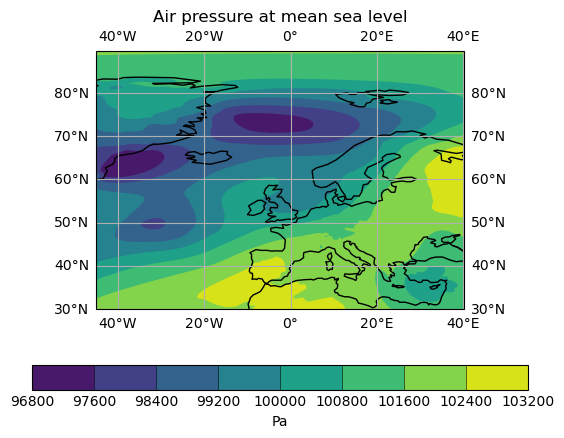

In [9]:
import iris.quickplot as qplt

# Plot the data
qplt.contourf(obs_psl_cube[0, :, :], cmap="viridis")

# add coastlines
ax = plt.gca()

ax.coastlines()

# Add gridlines
ax.gridlines(draw_labels=True)

# Show the plot
plt.show()

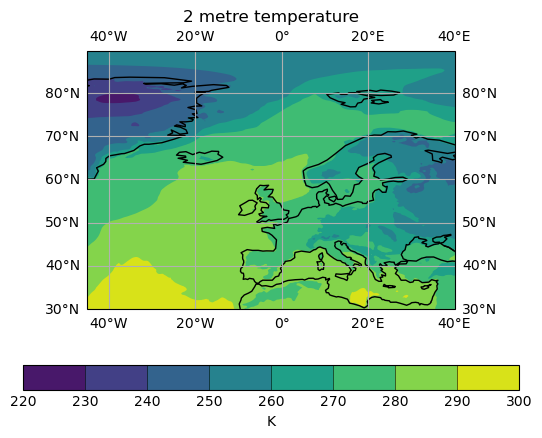

In [10]:
# do the same for temperature
qplt.contourf(obs_tas_cube[0, :, :], cmap="viridis")

# add coastlines
ax = plt.gca()

ax.coastlines()

# Add gridlines
ax.gridlines(draw_labels=True)

# Show the plot
plt.show()

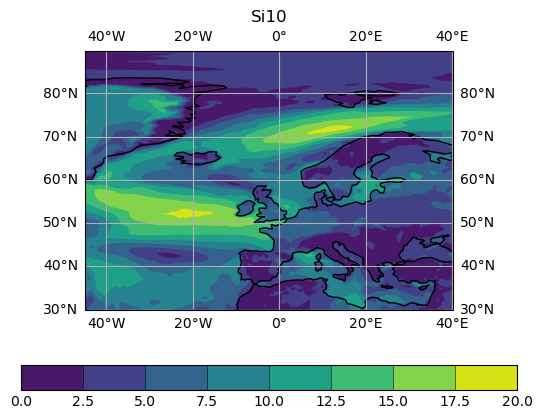

In [11]:
# Do the same for wind
qplt.contourf(obs_sfcWind_cube[0, :, :], cmap="viridis")

# add coastlines
ax = plt.gca()

ax.coastlines()

# Add gridlines
ax.gridlines(draw_labels=True)

# Show the plot
plt.show()

In [14]:
# ---------------------------------
# Now we want to subset the data to DJF winter days
# and the correct years
# and calculate the climatologies - for temp, wind and MSLP
# ---------------------------------

# Set up the start date and end date
start_date = "1961-12-01"
end_date = "2018-04-01"

# Convert the dates to datetime objects
start_date_dt = pd.to_datetime(start_date)
end_date_dt = pd.to_datetime(end_date)

# Set up the time constraint
time_constraint = iris.Constraint(
    time=lambda cell: start_date_dt <= cell.point <= end_date_dt
)

# Constrain the cube to the specified period
obs_psl_cube_time = obs_psl_cube.extract(time_constraint)
obs_sfcWind_cube_time = obs_sfcWind_cube.extract(time_constraint)
obs_tas_cube_time = obs_tas_cube.extract(time_constraint)

# Subset the cubes to DJF
obs_psl_cube_djf = obs_psl_cube_time.extract(iris.Constraint(time=lambda cell: cell.point.month in [12, 1, 2]))
obs_sfcWind_cube_djf = obs_sfcWind_cube_time.extract(iris.Constraint(time=lambda cell: cell.point.month in [12, 1, 2]))
obs_tas_cube_djf = obs_tas_cube_time.extract(iris.Constraint(time=lambda cell: cell.point.month in [12, 1, 2]))

In [15]:
obs_psl_cube_djf

<iris 'Cube' of air_pressure_at_mean_sea_level / (Pa) (time: 5144; latitude: 214; longitude: 304)>

In [16]:
%%time
# ---------------------------------
# Now take the mean over the time dimension to quantify the climatology
# ---------------------------------

# Take the mean over the time dimension
obs_psl_cube_djf_mean = obs_psl_cube_djf.collapsed("time", iris.analysis.MEAN)
obs_sfcWind_cube_djf_mean = obs_sfcWind_cube_djf.collapsed("time", iris.analysis.MEAN)
obs_tas_cube_djf_mean = obs_tas_cube_djf.collapsed("time", iris.analysis.MEAN)

# Extract the actual values
obs_psl_djf_clim_vals = obs_psl_cube_djf_mean.data
obs_sfcWind_djf_clim_vals = obs_sfcWind_cube_djf_mean.data
obs_tas_djf_clim_vals = obs_tas_cube_djf_mean.data

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/iris/coords.py:2182: IrisVagueMetadataWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(
/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/iris/coords.py:2171: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'time', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'time'. Ignoring bounds.
  warnings.warn(
/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/iris/coords.py:2171: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'time', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'time'. Ignoring bounds.
  warnings.warn(


KeyboardInterrupt: 